In [3]:
import numpy as np
import torch
import matplotlib
from matplotlib import pyplot as plt 

In [32]:
x = torch.arange(5,dtype = float)
print(x.shape)
x.requires_grad_(True)
y = torch.dot(x,x)

y.backward()
print(x.grad)

x.grad.zero_()
y = x * x
z = y.detach()
h = torch.dot(y,z)
h.backward()

x.grad == z * 2 * x 

torch.Size([5])
tensor([0., 2., 4., 6., 8.], dtype=torch.float64)


tensor([True, True, True, True, True])

In [33]:
x = torch.arange(5,dtype = float)
print(x.shape)
x.requires_grad_(True)
y = torch.dot(x,x)

y.backward()
print(x.grad)

x.grad.zero_()
y = z = x * x
z.detach()
h = torch.dot(y,z)
h.backward()

x.grad == z * 2 * x 

torch.Size([5])
tensor([0., 2., 4., 6., 8.], dtype=torch.float64)


tensor([ True, False, False, False, False])

In [14]:
import os 
import pandas as pd

os.makedirs(os.path.join(".","result_path"),exist_ok=True)
data_file = os.path.join(".","result_path","data.csv")
with open(data_file,"w") as f:
    f.write("Number,Name,Price\n")
    f.write("NaN,NaN,20000\n")
    f.write("3,july,30000\n")
    f.write("4,julia,40000\n")
    f.write("2,john,40000\n")

data = pd.read_csv(data_file)
input, output = data.iloc[:,0], data.iloc[:,1]
input = input.fillna(input.mean())

output = pd.get_dummies(output,dummy_na=True)

x, y = torch.tensor(input.values), torch.tensor(output.values)
print(x,y)

tensor([3., 3., 4., 2.], dtype=torch.float64) tensor([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0]], dtype=torch.uint8)


In [38]:
#线性回归的从零开始实现
a = torch.arange(5)
print(a.shape)
a.reshape((-1,1))
b = torch.arange(25).reshape((5,5))
c = torch.matmul(b,a)
d = torch.matmul(a,b)
print(a.shape,c.shape,d.shape)
print(b)
print(c)
print(d)

#pytorch中对一维的向量是列向量和行向量并不是有很大的区分度

torch.Size([5])
torch.Size([5]) torch.Size([5]) torch.Size([5])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
tensor([ 30,  80, 130, 180, 230])
tensor([150, 160, 170, 180, 190])


tensor([ 0.6732, -0.6234]) tensor(-2.5210)
torch.Size([1000])


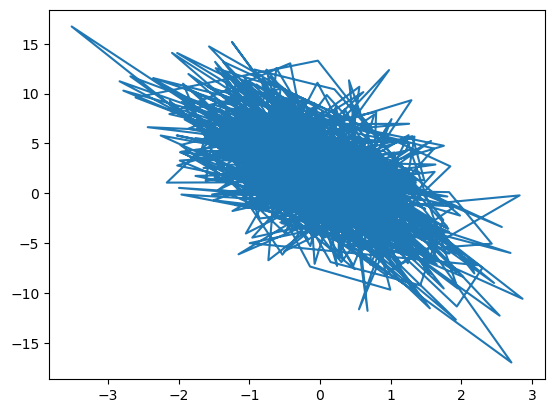

In [3]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# y = X * w + b + n (n为噪声)
def make_dataset(w, b, length):
    x = torch.normal(0,1,(length, 2))
    y = torch.matmul(x,w) + b
    n = torch.normal(0,0.01,y.shape)
    y += n

    return x, y

true_w = torch.tensor([-3.0,4.0])
true_b = torch.tensor(2)
object_property, ober_data = make_dataset(true_w,true_b,1000)

print(object_property[0],ober_data[0]) 
print(ober_data.shape)

plt.figure()
plt.plot(object_property[:,0],ober_data)
plt.show()

In [53]:
import random
import matplotlib
from matplotlib import pyplot as plt

# y = X * w + b + n (n为噪声)
def make_dataset(w, b, length):
    x = torch.normal(0,1,(length, 2))
    y = torch.matmul(x,w) + b
    n = torch.normal(0,0.01,y.shape)
    y += n
    return x, y

true_w = torch.tensor([-3.0,4.0])
true_b = torch.tensor(2)
object_property, ober_data = make_dataset(true_w,true_b,1000)

def iteration_data(patch_size,x,y):
    '''小批量训练'''
    data_number = len(y)
    list_number = list(range(data_number))
    random.shuffle(list_number)
    for i in range(0,data_number,patch_size):
        select_part = torch.tensor(list_number[i:min(i+patch_size,data_number)])
        yield x[select_part],y[select_part]

for x,y in iteration_data(10,object_property,ober_data):
    print(x,y)

tensor([[-0.1438, -0.2379],
        [ 1.0200, -1.0974],
        [ 0.0145,  0.2720],
        [-1.3670, -1.4960],
        [ 1.1117, -0.0377],
        [-0.1052,  0.8028],
        [-1.2683, -1.1252],
        [-1.2906, -0.7767],
        [-1.3792,  0.1471],
        [ 0.2069,  0.7996]]) tensor([ 1.4863, -5.4295,  3.0401,  0.1073, -1.4695,  5.5306,  1.2882,  2.7642,
         6.7403,  4.5673])
tensor([[-0.7258, -0.0392],
        [ 1.9120,  0.0551],
        [-0.0234, -1.3080],
        [ 0.3030, -2.9028],
        [ 0.7541,  0.4053],
        [-1.0702,  0.8085],
        [-1.6693, -2.3881],
        [ 0.4523,  0.4340],
        [ 0.3496,  0.0842],
        [ 1.6116,  1.0873]]) tensor([  4.0254,  -3.5176,  -3.1486, -10.5278,   1.3631,   8.4285,  -2.5541,
          2.3908,   1.2750,   1.5090])
tensor([[ 0.2361,  0.1491],
        [ 0.4679,  0.7266],
        [-0.6048,  1.7402],
        [ 0.5268, -0.7063],
        [ 2.3707,  0.5309],
        [-0.9051,  2.0467],
        [-1.8732, -1.7395],
        [ 1.4731, 

In [84]:
import random
import matplotlib
from matplotlib import pyplot as plt

# y = X * w + b + n (n为噪声)
def make_dataset(w, b, length):
    x = torch.normal(0,1,(length, 2))
    y = torch.matmul(x,w) + b
    n = torch.normal(0,0.01,y.shape)
    y += n
    return x, y 

true_w = torch.tensor([2,-3.4])
true_b = torch.tensor(4.2)
object_property, ober_data = make_dataset(true_w,true_b,1000)

def iteration_data(patch_size,x,y):
    '''小批量训练所需的随机小批量数据'''
    data_number = len(y)
    list_number = list(range(data_number))
    random.shuffle(list_number)
    for i in range(0,data_number,patch_size):
        select_part = torch.tensor(list_number[i:min(i+patch_size,data_number)])
        yield x[select_part],y[select_part]

ori_w = torch.normal(0,0.01,(2,1),requires_grad=True)
ori_b = torch.zeros(1,requires_grad=True)

def line_squ(w,b,x):
    '''类似net的部分 正向计算'''
    return torch.matmul(x,w) + b

def loss_comp(ori_y,y):
    '''loss function'''
    return (ori_y - y.reshape(ori_y.shape)) ** 2 / 2

def adjust_parameters(paras,lr,batch_size):
    '''更新参数'''
    with torch.no_grad():
        for para in paras:
            para -= lr * para.grad / batch_size
            para.grad.zero_()

epoch_number = 3
lr = 0.03
patch_size = 10
#下面的两个参数是可以移植到网络中使用的：
net = line_squ
loss = loss_comp

for epoch in range(epoch_number):
    for x,y in iteration_data(patch_size,object_property,ober_data):
        loss_number = loss(y,net(ori_w,ori_b,x))
        loss_number.sum().backward()
        adjust_parameters([ori_w,ori_b],lr,patch_size)
    with torch.no_grad():
        total_loss = loss(ober_data,net(ori_w,ori_b,object_property)).mean()
        print(f"epoch: {epoch+1}",end=" ")
        print(f"loss: {total_loss.detach().numpy()}")
    
print(ori_b,ori_w)
#在计算loss的时候一定要注意向量tensor如tensor.shape(10)和tensor.shape(10,1) 这样的loss计算会出现广播机制 导致优化出现错误

epoch: 1 loss: 0.027333106845617294
epoch: 2 loss: 9.451345249544829e-05
epoch: 3 loss: 4.701418220065534e-05
tensor([4.1987], requires_grad=True) tensor([[ 2.0005],
        [-3.3991]], requires_grad=True)


In [91]:
a = torch.normal(0,1,(2,1))
b = torch.normal(0,1,(1,1))

for element in [a,b]:
    print(element)

tensor([[-0.8620],
        [ 0.7729]])
tensor([[0.0585]])


In [14]:
import random

def make_dataset(w,b,data_number):
    X = torch.normal(1,5,(data_number,2))
    y = torch.matmul(X,w) + b
    n = torch.normal(1,0.01,y.shape)
    y += n
    return X,y

w = torch.tensor([-3.2,4.0])
b = torch.tensor(2.0)

property, observation = make_dataset(w,b,1000)

def iter_data(x,y,batch_size):
    data_number = len(y)
    data_list = list(range(data_number))
    random.shuffle(data_list)
    for i in range(0,data_number,batch_size):
        select_part = torch.tensor(data_list[i:min(i+batch_size,data_number)])
        yield x[select_part], y[select_part]

def loss(y,ori_y):
    return (ori_y - y.reshape(ori_y.shape)) ** 2 / 2 

def linesquare(w,b,x):
    return torch.matmul(x,w) + b

def updateparas(paras,lr,batch_size):
    with torch.no_grad():
         for para in paras:
             para -= lr * para.grad / batch_size
             para.grad.zero_()

init_w = torch.normal(0,3,(2,1),requires_grad=True)
init_b = torch.zeros((),requires_grad=True)
batch_size = 10
lr = 0.03
epoch_number = 3

for epoch in range(epoch_number):
    for x,y in iter_data(property, observation, batch_size):
        batch_loss = loss(linesquare(init_w,init_b,x),y)
        batch_loss.sum().backward()
        updateparas((init_w,init_b),lr,batch_size)
    with torch.no_grad():
        total_loss = loss(linesquare(init_w,init_b,property),observation)
        print(f"epoch:{epoch},loss:{total_loss.mean()}\n")

print(init_w,init_b)

epoch:0,loss:0.03414550796151161

epoch:1,loss:0.0001891998981591314

epoch:2,loss:5.5526958021800965e-05

tensor([[-3.2004],
        [ 4.0003]], requires_grad=True) tensor(2.9990, requires_grad=True)


In [2]:
import numpy
import torch
from torch.utils import data
from torch import nn
import random

def make_data(w,b,data_number):
    X = torch.normal(1,5,(data_number,2))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,1,(y.shape))
    return X,y.reshape(-1,1)

correct_w = torch.tensor([2.0,-3.4])
correct_b = 4.2
batch_size = 10

data_property, data_obersavation = make_data(correct_w,correct_b,1000)
print(data_obersavation.shape)

def data_iter(ori_data,batch_size):
    dataset = data.TensorDataset(*ori_data)
    selection_data = data.DataLoader(dataset,batch_size,shuffle = True)
    return selection_data

#print(next(iter(data_iter((data_property,data_obersavation),10))))

loss = nn.MSELoss()

net = nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

trainer = torch.optim.SGD(net.parameters(),lr = 0.01)
epoch_number = 20

for epoch in range(epoch_number):
    for X,y in data_iter((data_property,data_obersavation),10):
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(data_property),data_obersavation)
    print(f"epoch:{epoch+1}, loss:{l}")

print(net[0].weight.data)

torch.Size([1000, 1])
epoch:1, loss:1.3480082750320435
epoch:2, loss:0.955123782157898
epoch:3, loss:0.9648288488388062
epoch:4, loss:0.9444919228553772
epoch:5, loss:0.9491166472434998
epoch:6, loss:1.0463436841964722
epoch:7, loss:1.0068342685699463
epoch:8, loss:1.1244075298309326
epoch:9, loss:1.1428474187850952
epoch:10, loss:1.2687546014785767
epoch:11, loss:0.9706421494483948
epoch:12, loss:0.936808705329895
epoch:13, loss:0.9366240501403809
epoch:14, loss:0.994637668132782
epoch:15, loss:0.9998911619186401
epoch:16, loss:0.9418200850486755
epoch:17, loss:1.0688016414642334
epoch:18, loss:1.2106473445892334
epoch:19, loss:0.9707741141319275
epoch:20, loss:1.1884353160858154
tensor([[ 1.9114, -3.3434]])


In [4]:
import numpy
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import d2l.torch as d2l

d2l.use_svg_display()
d2l.plt.subplot

<function matplotlib.pyplot.subplot(*args, **kwargs)>

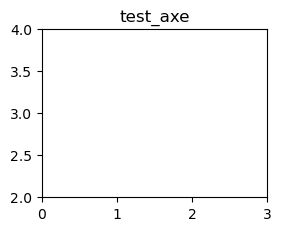

In [76]:
#简单的axe绘制方法

import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.set(xlim = [0,3],ylim = [2,4],title = "test_axe")
plt.show()

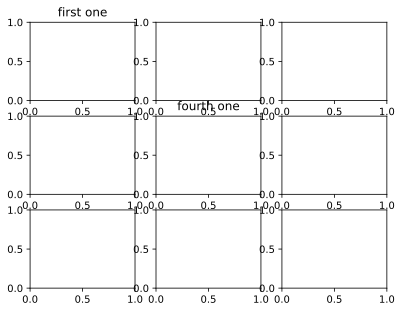

In [10]:
#设置多个axe也可以使用下面的写法
'''会出现挤在一起的问题'''
fig, ax = plt.subplots(nrows=3, ncols=3)
ax[0,0].set(title = "first one")
ax[1,1].set(title = "fourth one")
plt.show()

C:\Users\10376\AppData\Local\Temp\ipykernel_15636\3165376259.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go--" (-> marker='o'). The keyword argument will take precedence.
  ax2 = plt.plot(x,y,"go--",marker = "+")


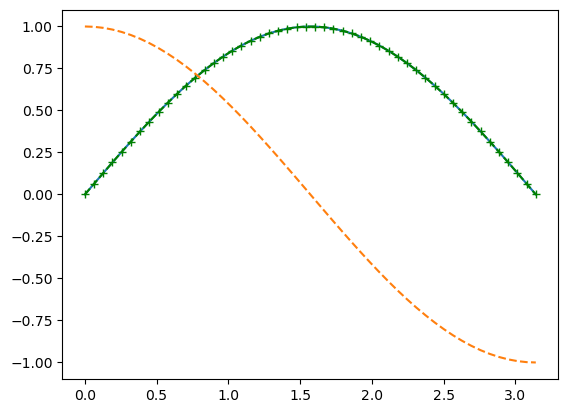

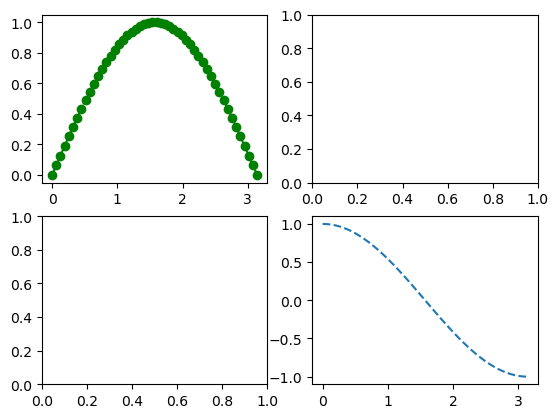

In [26]:
#会画在一个AXE上
x = np.linspace(0,np.pi)
y = np.sin(x)
z = np.cos(x)

ax1 = plt.plot(x,y)
ax2 = plt.plot(x,y,"go--",marker = "+")
ax3 = plt.plot(x,z,linestyle = "dashed")
plt.show()

fig, ax = plt.subplots(nrows = 2,ncols = 2)
ax[0,0].plot(x,y,"go--")
ax[1,1].plot(x,z,linestyle = "dashed")
plt.show()

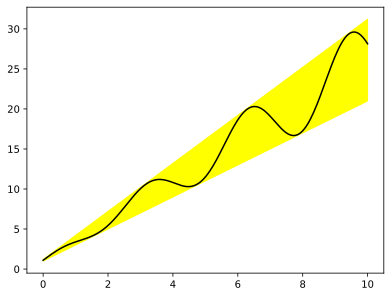

In [24]:
x = np.linspace(0,10,200)
data_obej = {
    "x":x,
    "y":2 * x + 1,
    "y_upper":3 * x + 1.2,
    "mean":0.5 * x * np.cos(2*x) + 2.5 * x + 1.1
}
fig, ax = plt.subplots()
ax.plot("x","mean",color = "black", data = data_obej)
ax.fill_between("x","y","y_upper",color = "yellow",data = data_obej)
plt.show()


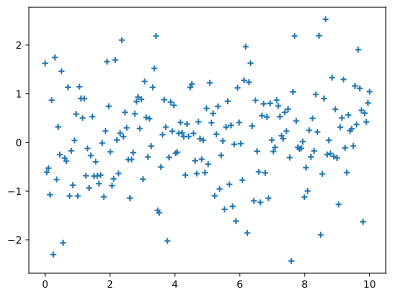

In [27]:
np.random.seed(1)

x = np.linspace(0,10,200)
y = np.random.randn(200)
plt.scatter(x,y,marker = "+")
plt.show()

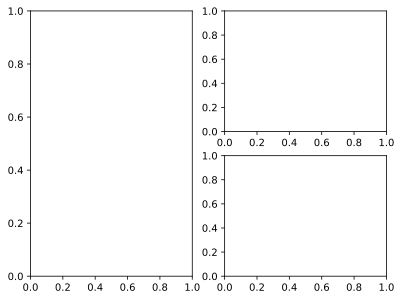

In [29]:
fig, axs = plt.subplot_mosaic([['left','right_top'],
                               ['left','right_bottom']])

In [80]:
import numpy
import torch
from torch.utils import data
import random

def make_data(w,b,data_number):
    X = torch.normal(0,1,size=[data_number,2])
    y = torch.matmul(X,w) + b
    n = torch.normal(0,0.01,size = y.shape)
    y += n
    return X,y.reshape(-1,1)

real_w = torch.tensor([3.2,-4.0])
real_b = torch.tensor([-5.6])

iter_property, out_obers = make_data(real_w,real_b,1000) 

def iter_data(ori_x,ori_y,batch_size):
    number = len(ori_y)
    number_list = list(range(number))
    random.shuffle(number_list)
    for i in range(0,number,batch_size):
        chosen_one = number_list[i:min(i+batch_size,number)]
        yield ori_x[chosen_one],ori_y[chosen_one]

def linemodel(w,b,x):
    return torch.matmul(x,w) + b

pre_w = torch.normal(0,1,(2,1),requires_grad = True)
pre_b = torch.normal(0,1,(),requires_grad = True)

def loss(ori_y,y):
    return (ori_y - y) ** 2 / 2

epoch_number = 10
batch_size = 10
lr = 0.03

def update_paras(paras,lr,batch_size):
    with torch.no_grad():
        for para in paras:
            para -= lr * para.grad / batch_size
            para.grad.zero_()

for epoch in range(epoch_number):
    for X,y in iter_data(iter_property,out_obers,batch_size):
        l = loss(y,linemodel(pre_w,pre_b,X))
        l.sum().backward()
        update_paras((pre_w,pre_b),lr,batch_size)
    with torch.no_grad():
        l = loss(out_obers,linemodel(pre_w,pre_b,iter_property))
        print(f"epoch:{epoch+1}, loss:{l.mean()}")

print(pre_w,pre_b)

epoch:1, loss:0.05817880481481552
epoch:2, loss:0.0001973324833670631
epoch:3, loss:5.139170752954669e-05
epoch:4, loss:5.107613105792552e-05
epoch:5, loss:5.1089475164189935e-05
epoch:6, loss:5.1235041610198095e-05
epoch:7, loss:5.108770710648969e-05
epoch:8, loss:5.125379539094865e-05
epoch:9, loss:5.116666216054e-05
epoch:10, loss:5.11273683514446e-05
tensor([[ 3.1996],
        [-3.9994]], requires_grad=True) tensor(-5.6000, requires_grad=True)


In [81]:
import numpy
import torch
from torch.utils import data
import torch.nn as nn
import d2l.torch as d2l

def make_data(w,b,data_number):
    X = torch.normal(0,1,(data_number,2))
    y = torch.matmul(X,w) + b
    n = torch.normal(0,0.01,size = y.shape)
    y += n
    return X,y.reshape(-1,1)

real_w = torch.tensor([2,-3.4])
real_b = 4.2

iter_property, out_obers = make_data(real_w,real_b,1000)

def data_iter(ori_data,batch_size):
    dataset = data.TensorDataset(*ori_data)
    data_iter = data.DataLoader(dataset,batch_size,shuffle = True)
    return data_iter

batch_size = 10

load_array = data_iter((iter_property,out_obers),batch_size)

loss = nn.MSELoss()

net = nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(3,0.01)
net[0].bias.data.fill_(0)

trainer = torch.optim.SGD(net.parameters(),lr = 0.03)

epoch_number = 3

for epoch in range(epoch_number):
    for x,y in load_array:
        l = loss(net(x),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(out_obers,net(iter_property))
    print(f"epoch:{epoch+1}, loss:{l}")

print(net[0].weight.data,net[0].bias.data)


epoch:1, loss:0.0002821587841026485
epoch:2, loss:9.026688348967582e-05
epoch:3, loss:8.97131030797027e-05
tensor([[ 2.0004, -3.4005]]) tensor([4.2002])


In [91]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import d2l.torch as d2l

d2l.use_svg_display()
  
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(root = "..\data",train = True,transform = trans,download = True)
mnist_test = torchvision.datasets.FashionMNIST(root = "..\data",train = False,transform = trans,download = True)
print(len(mnist_train),len(mnist_test))
print(mnist_train[0][0].shape)

60000 10000
torch.Size([1, 28, 28])


In [89]:
#熟悉python此类语法
y = torch.tensor([[1,2,3],[4,5,6]])
print(y[[0,1],[2]]) #类似切片的操作
print(len(y)) #只输出第一个维度的长度 

tensor([3, 6])
2


In [116]:
import time

def worker_num():
    return 8

train_iter = data.DataLoader(mnist_train,batch_size = 18,shuffle = True,num_workers= worker_num())

# print(len(train_iter)) #3334


class Timer:
    """Record multiple running times."""
    def __init__(self):
        """Defined in :numref:`sec_minibatch_sgd`"""
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()
    
timer = Timer()
for X,y in train_iter:
    continue

print(f"{timer.stop():.2f}")
#4进程的时候是5.28s
#1进程的时候是4.61s
#8进程的时候是3.53s
#在这里观察读取时间的原因是通常DATALOADER的读取时间和trian的时间应该相互匹配，稍快一点，这也是常见的训练时期的一个性能瓶颈

3.53


In [1]:
import torch
from torch.utils import data
import torchvision
from torchvision import transforms

def data_loader(batch_size,resize = None):
    trans = [transforms.ToTensor()]  #函数也可以放在容器中
    if resize:
        #trans.insert(0,torch.reshape(resize)) #Resize和reshape不太一样 当需要对图像进行图像大小填充时 Resize才可以使用
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = "../data",train = True,transform = trans)
    mnist_test = torchvision.datasets.FashionMNIST(root = "../data",train = False,transform = trans)

    return data.DataLoader(mnist_train,batch_size,shuffle = True),data.DataLoader(mnist_test,batch_size,shuffle = True)

train_iter,test_iter = data_loader(18,resize = 64)
for X,y in train_iter:
    print(X.shape,X.dtype)
    break

torch.Size([18, 1, 64, 64]) torch.float32


In [20]:
from matplotlib_inline import backend_inline

class Animator:
    def __init__(self,xlabel = None,ylabel = None,legend = None,xlim = None,
                 ylim = None,xscale = 'linear',yscale = 'linear',
                 fmts = ('-','m--','g-.','r:'),nrows = 1, ncols = 1,
                 figsize = (3.5,2.5)):
        if legend is None:
            legend = []
        backend_inline.select_figure_formats("svg")
        self.fig,self.axes = plt.subplots(nrows,ncols,figsize = figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        self.config_axes = lambda:d2l.set_axes(
            self.axes[0],xlabel,ylabel,xlim,ylim,xscale,yscale,legend
        )
        self.X,self.Y,self.fmts = None,None,fmts
    
    def add(self,x,y):
        if not hasattr(y,"__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x,"__len__"):
            x = [x] * n
        if not self.X:
            self.X = [ [] for _ in range(n)]
        if not self.Y:
            self.Y = [ [] for _ in range(n)]
        for i,(a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x,y,fmt in zip(self.X,self.Y,self.fmts):
            self.axes[0].plot(x,y,fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait = True) #动态输出Ipython中的display元素


In [4]:
#以下的写法在数组中是不支持的
a =  [0,2]

b = [[0.1,0.5,0.4],
[0.3,0.3,0.4]]

#print(b[[0,1],a[0,1]]) #TypeError: list indices must be integers or slices, not tuple

#但以下的写法在torch模块中是支持的 而且在一些特定的情况下能让代码可读性更强
a = torch.tensor([0,2])

b = torch.tensor([[0.1,0.5,0.4],
                 [0.3,0.3,0.4]])

# print(b[[0,1],a])
# print(crossentropy(b,a))



In [8]:
from kan import *

model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape


(torch.Size([1000, 2]), torch.Size([1000, 1]))

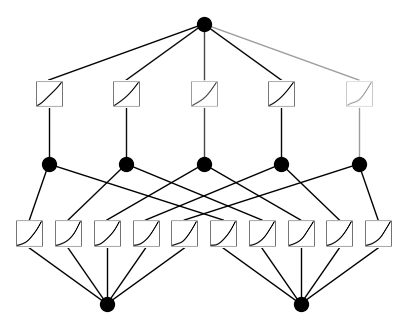

In [10]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

In [12]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 1.20e-01 | test loss: 1.28e-01 | reg: 2.66e+01 : 100%|██| 20/20 [00:05<00:00,  3.82it/s]


{'train_loss': [array(0.12957363, dtype=float32),
  array(0.12883528, dtype=float32),
  array(0.12553543, dtype=float32),
  array(0.12500727, dtype=float32),
  array(0.12386634, dtype=float32),
  array(0.12053152, dtype=float32),
  array(0.12142756, dtype=float32),
  array(0.12174154, dtype=float32),
  array(0.1226225, dtype=float32),
  array(0.12065203, dtype=float32),
  array(0.12031543, dtype=float32),
  array(0.12161732, dtype=float32),
  array(0.12399919, dtype=float32),
  array(0.12442787, dtype=float32),
  array(0.12211625, dtype=float32),
  array(0.12343517, dtype=float32),
  array(0.12010819, dtype=float32),
  array(0.11956099, dtype=float32),
  array(0.11997218, dtype=float32),
  array(0.11998301, dtype=float32)],
 'test_loss': [array(0.13552696, dtype=float32),
  array(0.13485055, dtype=float32),
  array(0.13191478, dtype=float32),
  array(0.13120787, dtype=float32),
  array(0.12935722, dtype=float32),
  array(0.12590449, dtype=float32),
  array(0.12808551, dtype=float32),
 

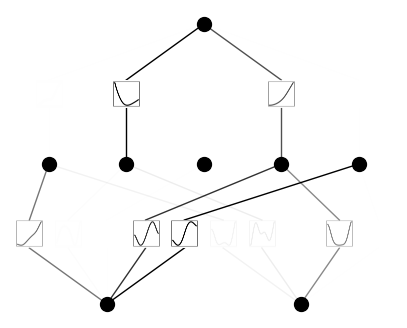

In [13]:
model.plot()

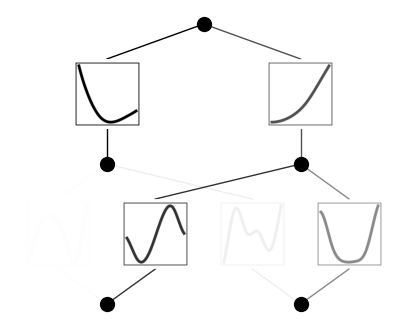

In [15]:
model.prune()
model.plot(mask=True)

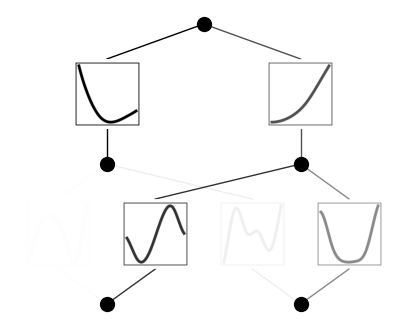

In [17]:
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 7.11e-03 | test loss: 7.03e-03 | reg: 6.29e+00 : 100%|██| 50/50 [00:06<00:00,  8.19it/s]


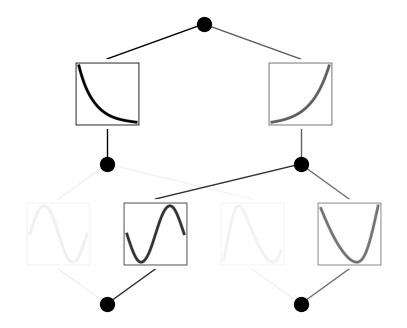

In [19]:
model.train(dataset, opt="LBFGS", steps=50)
model.plot()

In [51]:
import torch
import random

def make_dataset(w,b,data_number):
    X = torch.normal(0,1,(data_number,2))
    y = torch.matmul(X,w) + b
    y += torch.normal(1,0.1,y.shape)

    return X,y.reshape(-1,1)

ori_w = torch.tensor([-2.1,3.4])
ori_b = torch.tensor(-5.5)
data_number = 1000
batch_size = 10

data_normal,data_ober = make_dataset(ori_w, ori_b, data_number)

def data_iter(X,y,batch_size):
    data_number = len(y)
    number_list = list(range(data_number))
    random.shuffle(number_list)
    for i in range(0,data_number,batch_size):
        select_part = torch.tensor(number_list[i:min(i+batch_size,data_number)])
        yield X[select_part],y[select_part]

iter_x, iter_y = next(iter(data_iter(data_normal,data_ober,batch_size)))

def net(w,b,x):
    return torch.matmul(x,w) + b

def loss(ori_y,y):
    return (y - ori_y) ** 2 / 2

epoch_number = 3
lr = 0.03

learn_w = torch.normal(0,0.1,(2,1),requires_grad = True)
learn_b = torch.zeros((),requires_grad = True)

def update_paras(paras,lr,batch_size):
    with torch.no_grad():
        for para in paras:
            para -= lr * para.grad / batch_size
            para.grad.zero_()


for epoch in range(epoch_number):
    for X,y in data_iter(data_normal,data_ober,batch_size):
        l = loss(y,net(learn_w,learn_b,X))
        l.sum().backward()
        update_paras((learn_w,learn_b),lr,batch_size)
    with torch.no_grad():
        loss_total = loss(data_ober,net(learn_w,learn_b,data_normal))
        print(f"epoch:{epoch + 1},loss:{loss_total.mean()}")

print(learn_w,learn_b)


epoch:1,loss:0.040010299533605576
epoch:2,loss:0.005390878766775131
epoch:3,loss:0.005345460493117571
tensor([[-2.1000],
        [ 3.3909]], requires_grad=True) tensor(-4.4966, requires_grad=True)


In [72]:
import torch
from torch.utils import data
from torch import nn
import d2l.torch as d2l

d2l.synthetic_data

def make_dataset(w,b,data_number):
    X = torch.normal(0,1,(data_number,2))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)

    return X,y.reshape(-1,1)

ori_w = torch.tensor([2,-3.4])
ori_b = torch.tensor(4.2)
data_number = 1000
batch_size = 10
lr = 0.03

data_normal, data_ober = make_dataset(ori_w,ori_b,data_number)

def data_iter(dataset,batch_size):
    data_set = data.TensorDataset(*dataset)
    return data.DataLoader(data_set,batch_size,shuffle = True)

net = nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.zero_()

loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(),lr)
epoch_number = 10

for epoch in range(epoch_number):
    for X,y in data_iter((data_normal,data_ober),batch_size):
        l = loss(y,net(X))
        trainer.zero_grad()
        l.backward()
        trainer.step()
    with torch.no_grad():
        l = loss(data_ober,net(data_normal))
        print(f"epoch:{epoch+1},loss:{l}") 

print(net[0].weight.data)

epoch:1,loss:0.00029175233794376254
epoch:2,loss:0.00010850410762941465
epoch:3,loss:0.00010777104762382805
epoch:4,loss:0.00010795540583785623
epoch:5,loss:0.00010832864791154861
epoch:6,loss:0.0001076610860764049
epoch:7,loss:0.00010829993698280305
epoch:8,loss:0.00010787675273604691
epoch:9,loss:0.00010898179607465863
epoch:10,loss:0.00010839413880603388
tensor([[ 1.9993, -3.4000]])


0.78515625


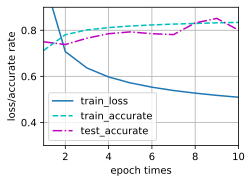

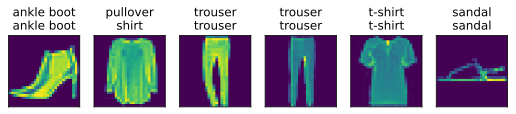

In [2]:
import torch
from torch.utils import data
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import matplotlib_inline
import time
from IPython import display
from matplotlib_inline import backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root = "../data",train = True,transform = trans,download = True)
mnist_test = torchvision.datasets.FashionMNIST(root = "../data",train = False,transform = trans,download = True)

def image_labels(ys):
    label_list = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [label_list[int(i)] for i in ys]

def show_images(images,labels,scale,rows=2,cols=9):
    fig_size = [cols * scale,rows * scale]
    _, axes = plt.subplots(nrows = rows,ncols = cols,figsize = fig_size)
    axes = axes.flatten()
    for i,(image,ax) in enumerate(zip(images,axes)):
        if torch.is_tensor(image):
            ax.imshow(image.numpy())
        else:
            ax.imshow(image)
        if labels:
            ax.set_title(labels[i])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

#image_example,image_label = next(iter(data.DataLoader(mnist_train,batch_size=18)))
#show_images(image_example.squeeze(),image_labels(image_label),1.5)

def make_dataset(batch_size,resize = None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)

    mnist_train = torchvision.datasets.FashionMNIST(root = "../data",train = True,transform = trans,download = True)
    mnist_test = torchvision.datasets.FashionMNIST(root = "../data",train = False,transform = trans,download = True)

    return data.DataLoader(mnist_train,batch_size,shuffle = True),data.DataLoader(mnist_test,batch_size,shuffle = True)


batch_size = 256
train_iter,test_iter = make_dataset(256)

#mnist size is 28*28
image_size = 784
train_w = torch.normal(0,0.01,(image_size,10),requires_grad= True)
train_b = torch.zeros((1,10), requires_grad = True)

def softmax(o):
    exp_o = torch.exp(o)
    exo_o_sumperrow = exp_o.sum(dim = 1,keepdim = True)
    return exp_o / exo_o_sumperrow

def net(w,b,x):
    return softmax(torch.matmul(x.reshape(-1,image_size),w) + b)

def crossentropy(y,ori_y):
    number = len(ori_y)
    return (-1) * torch.log(y[range(number),ori_y])

def accurate_number(ori_y,y):
    y_select = torch.argmax(y,dim = 1,keepdim = True)
    ori_y = ori_y.reshape(-1,1)
    judge_y = ori_y == y_select.type(ori_y.dtype)
    return judge_y.type(ori_y.dtype).sum()

class Accumulator():
    def __init__(self,num):
        self.reset(num)
    def add(self,*content):
        self.accumulator = [a + float(b) for a,b in zip(self.accumulator,content)]
    def reset(self,num):
        self.accumulator = [0] * num
        self.num = num

def accurate_rate(net,w,b,X,ori_y):
    record = Accumulator(2)
    if isinstance(net,torch.nn.Module):
        net.eval()
    with torch.no_grad():
        a_number = accurate_number(ori_y, net(w,b,X))
        record.add(a_number,len(ori_y))
    return record.accumulator[0] / record.accumulator[1]

class compute_time():
    def __init__(self):
        self.time_list = []
        self.begin()
    def begin(self):
        self.current_time = time.time()
    def stop(self):
        self.time_list.append(time.time() - self.current_time)
        return self.time_list[-1]
    
lr = 0.03

def updater(paras,lr,batch_size):
    with torch.no_grad():
        for para in paras:
            para -= lr * para.grad / batch_size
            para.grad.zero_()

def config_figure(axes,xlim,ylim,xlabel,ylabel,xscale,yscale,legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

class Animator:
    def __init__(self,xlim,ylim,xlabel,ylabel,
                 xscale = "linear",yscale = "linear",
                 fmts = ("-","c--","m-.","y:"),
                 legend = None,nrows = 1,ncols = 1,
                 figsize = (3.5,2.5)):
        fig,axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = figsize)
        if nrows * ncols == 1:
            axes = [axes,]
        self.fig = fig
        self.axes = axes
        self.config_axes = lambda : config_figure(axes[0],xlim,ylim,xlabel,ylabel,xscale,yscale,legend)
        self.X,self.Y,self.fmts = None,None,fmts

    def add(self,x,y):
        if not hasattr(y,"__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x,"__len__"):
            x = [x] * n
        backend_inline.set_matplotlib_formats("svg")
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i,(xpart,ypart) in enumerate(zip(x,y)):
            self.X[i].append(xpart)
            self.Y[i].append(ypart)
        self.axes[0].cla()
        for xline,yline,fmt in zip(self.X,self.Y,self.fmts):
            self.axes[0].plot(xline,yline,fmt)
        self.config_axes()   
        display.display(self.fig)
        display.clear_output(wait = True) 
        
def train_epoch():
    if isinstance(net,torch.nn.Module):
        net.train()
    record = Accumulator(3)
    if not isinstance(updater,torch.optim.Optimizer):
        for X, y in train_iter:
            l = crossentropy(net(train_w,train_b,X),y)
            l.sum().backward()
            updater((train_w,train_b),lr,batch_size)
            record.add(len(y),l.sum(),accurate_number(y,net(train_w,train_b,X)))
    return record.accumulator[1] / record.accumulator[0],record.accumulator[2] / record.accumulator[0]

epoch_number = 10

def total_train():
    animator = Animator(xlim = [1,epoch_number],ylim = [0.3,0.9],xlabel = "epoch times",ylabel = "loss/accurate rate",
                 xscale = "linear",yscale = "linear",
                 fmts = ("-","c--","m-.","y:"),
                 legend = ["train_loss","train_accurate","test_accurate"])
    for epoch in range(epoch_number):
        train_result = train_epoch()
        test_x, test_y = next(iter(test_iter))
        test_result = accurate_rate(net,train_w,train_b,test_x,test_y)
        animator.add(epoch+1, train_result+(test_result,))

total_train()

# x,y = next(iter(train_iter))
# print(accurate_number(y,net(train_w,train_b,x)))
# print(int(accurate_number(y,net(train_w,train_b,x))))

train_iter2,test_iter2 = make_dataset(6)
test_x, test_y = next(iter(test_iter))

def predict_test(test_iter):
    test_x, test_y = next(iter(test_iter))
    true_labels = image_labels(test_y)
    pred_labels = image_labels(net(train_w,train_b,test_x).argmax(dim=1))
    labels = [true_labels[i] + "\n" + pred_labels[i] for i in range(len(test_y))]
    show_images(test_x.squeeze(),labels,scale = 1.5,rows=1,cols=6)

predict_test(test_iter2)
print(accurate_rate(net,train_w,train_b,test_x,test_y))







In [13]:


label_list = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

3 4 3
3


In [7]:
import torch
import torch.nn as nn

def make_datasets(batch_size,resize = None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = "../data",train = True,transform = trans,download = True)
    mnist_test = torchvision.datasets.FashionMNIST(root = "../data",train = False,transform = trans,download = True)
    return data.DataLoader(mnist_train,batch_size,shuffle = True), data.DataLoader(mnist_test,batch_size,shuffle = True)

batch_size = 256
train_iter, test_iter = make_datasets(batch_size)

class Accumulator:
    def __init__(self,num):
        self.len = num
        self.reset()
    def add(self,*content):
        self.list = [a + float(b) for a,b in zip(self.list,content)]
    def reset(self):
        self.list = [0.0] * self.len

def decorate(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

class Animator_2:
    def __init__(self,xlabel,ylabel,
                 xlim,ylim,xscale = "linear",yscale = "linear",
                 legend = None,nrows= 1,ncols =1,fmts = ["-","c--","m-.","y:"],
                 fig_size = [3.5,2.5]):
        self.fig, self.axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = fig_size)
        if nrows * ncols == 1:
            self.axes = [self.axes]
        self.config = lambda : decorate(self.axes[0],xlabel,ylabel,xlim,ylim,xscale,yscale,legend)
        self.X, self.Y,self.fmts = None,None,fmts

    def add(self,x,y):
        if not hasattr(y,"__len__"):
            y = [y]
        num = len(y)
        if not hasattr(x,"__len__"):
            x = [x] * num
        if not self.X:
            self.X = [[] for _ in range(num)]
        if not self.Y:
            self.Y = [[] for _ in range(num)]
        for i,(partx,party) in enumerate(zip(x,y)):
            self.X[i].append(partx)
            self.Y[i].append(party)
        matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
        self.axes[0].cla()
        for eachx,eachy,fmt in zip(self.X,self.Y,self.fmts):
            self.axes[0].plot(eachx,eachy,fmt)
        self.config()
        display.display(self.fig)
        display.clear_output(wait = True)

net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_paras(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)

net.apply(init_paras)

loss = nn.CrossEntropyLoss()

lr = 0.03

trainer = torch.optim.SGD(net.parameters(),lr)

def accu_number(ori_y,y):
    select_y = torch.argmax(y,dim=1,keepdim = True)
    ori_y = ori_y.reshape(-1,1)
    judge_y = ori_y == select_y.type(ori_y.dtype)
    return judge_y.type(ori_y.dtype).sum()

def accu_rate(net,iter):
    if isinstance(net,nn.Module):
        net.eval()
    accmulate = Accumulator(2)
    for X,y in iter:
        break
    accmulate.add(len(y),accu_number(y,net(X)))
    return accmulate.list[1] / accmulate.list[0]

def train_epoch(net,loss,trainer,data_iter):
    accumulate = Accumulator(3)
    if isinstance(net,nn.Module):
        net.train()
    for X, y in data_iter:
        if isinstance(trainer,torch.optim.Optimizer):
            l = loss(net(X),y)
            trainer.zero_grad()
            l.mean().backward()
            trainer.step()
            with torch.no_grad():
                accumulate.add(len(y),l.sum(),accu_number(y,net(X)))

    return accumulate.list[1] / accumulate.list[0], accumulate.list[2] / accumulate.list[0]

epoch_time = 10

def train_total(epoch_number,net,loss,trainer,train_iter,test_iter):
    animator = Animator_2(xlabel = "epoch time",ylabel = "loss/accurate rate",
                 xlim = [0,epoch_time-1],ylim = [0.3,0.9],xscale = "linear",yscale = "linear",
                 legend = ["training loss","train accurate rate","test accurate rate"],nrows= 1,ncols =1,fmts = ["-","c--","m-.","y:"],
                 fig_size = [3.5,2.5])
    for epoch in range(epoch_number):
        train_result = train_epoch(net,loss,trainer,train_iter)
        animator.add(epoch,train_result + (accu_rate(net,test_iter),))

#train_total(epoch_time,net,loss,trainer,train_iter,test_iter)

def image_labels(ys):
    label_list = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [label_list[int(i)] for i in ys]

def show_images(images,labels,scale,rows=2,cols=9):
    fig_size = [cols * scale,rows * scale]
    _, axes = plt.subplots(nrows = rows,ncols = cols,figsize = fig_size)
    axes = axes.flatten()
    for i,(image,ax) in enumerate(zip(images,axes)):
        if torch.is_tensor(image):
            ax.imshow(image.numpy())
        else:
            ax.imshow(image)
        if labels:
            ax.set_title(labels[i])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

train_iter2, test_iter2 = make_datasets(16)

def test_accuracy(net,test_iter):
    print(accu_rate(net,test_iter))
    x,y = next(iter(test_iter))
    total_labels = [y1 + "\n" + y2 for y1,y2 in zip(image_labels(y),image_labels(net(x).argmax(dim=1)))]
    show_images(x.squeeze(),total_labels,scale = 3,rows = 2,cols = 8)

#test_accuracy(net,test_iter2)



(array([[0.17701149, 0.23908046, 0.30114943, 0.36321839],
       [0.23908046, 0.34022989, 0.44137931, 0.54252874],
       [0.30114943, 0.44137931, 0.5816092 , 0.72183908],
       [0.36321839, 0.54252874, 0.72183908, 0.90114943]]), 0.5)


In [16]:
a = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
],dtype = np.double)
b = np.array([
    [1,2],
    [3,4],
    [5,6]
],dtype = np.complex64)

print(a@b)
print(np.double(2))

[[ 22.+0.j  28.+0.j]
 [ 49.+0.j  64.+0.j]
 [ 76.+0.j 100.+0.j]]
2.0


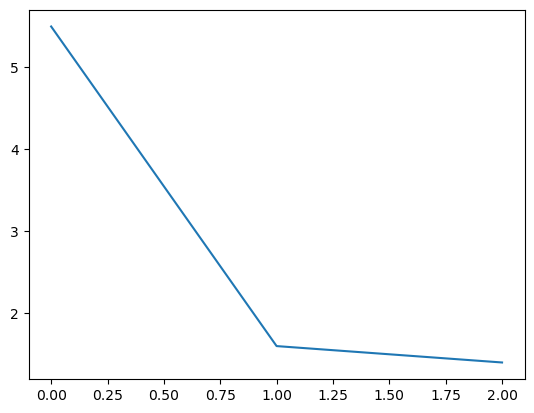

In [20]:
import matplotlib.pyplot as plt

a = np.array([5.5,1.6+5j,1.4-1j])

if np.iscomplexobj(a):
    a.imag = 0

_,axes = plt.subplots(1,1)
axes.plot(np.arange(0,3),a)

In [15]:
format = "this is an example like %s"
content = "tuple"
format % content

'this is an example like tuple'

In [19]:
format = "this is an example like %.3f and %s"
content = (3.5256612,"list")
format % content

'this is an example like 3.526 and list'

In [24]:
from string import Template

strtemp = Template("this is a $first and $second")
strtemp.substitute(first = "one",second = "two")

'this is a one and two'

In [26]:
"{0} {1} {2} {1} {0} {1}".format("one","two","three")

'one two three two one two'

In [28]:
from math import e

f"this is original number:{e}"

'this is original number:2.718281828459045'

In [31]:
import math

string = "the module {mod.__name__} of number is {mod.pi} ".format(mod = math)
string

'the module math of number is 3.141592653589793 '

In [2]:
import numpy as np 

print(np.pi)


3.141592653589793


In [4]:
print(np.array([[1],[2]]).shape)
print(np.array([1,2]).shape)

(2, 1)
(2,)


In [1]:
a = np.array([1.0,2.0,3.0])
b = np.array([2.0,3.0,0.2])
print(np.array([a,b]))

c = np.array(1)
d = np.array(2)
print(np.array([c,d]).shape)

NameError: name 'np' is not defined

In [1]:
a = np.array([1,2,3])
b = np.array([2,3,4])
a @ b

NameError: name 'np' is not defined

In [16]:
import torch
import numpy as np

a = np.arange(0,10) * 0.01
a = a.reshape(-1,1)
print(a.shape)
b = a
print(np.concatenate((a,b),axis = 1).shape)

(10, 1)
(10, 2)


In [25]:
import numpy as np
a = np.random.random((2,3))
print(a)
a = a.T
print(a)
b = np.flip(a,axis=1)
print(b)

[[0.37244266 0.18088919 0.38717499]
 [0.09441907 0.55249401 0.28670611]]
[[0.37244266 0.09441907]
 [0.18088919 0.55249401]
 [0.38717499 0.28670611]]
[[0.09441907 0.37244266]
 [0.55249401 0.18088919]
 [0.28670611 0.38717499]]
